In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")

warnings.filterwarnings("ignore")

In [2]:
tanggal = ["tap_in_time", "tap_out_time"]

origin = pandas.read_table("okajakpril.csv", sep=",", parse_dates=tanggal)

origin.iloc[:5, :7]

,trans_id,pay_card_id,pay_card_bank,pay_card_name,pay_card_sex,pay_card_birth_date,corridor_id
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12


In [3]:
origin.iloc[:5, 7:14]

,corridor,direction,tap_in_stop,tap_in_stop_name,stop_start_seq,tap_in_time,tap_out_stop
0,Matraman Baru - Ancol,1.0,P00142,Pal Putih,7,2023-04-03 05:21:44,P00253
1,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,13,2023-04-03 05:42:44,B03307P
2,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,38,2023-04-03 05:59:06,B04962P
3,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,23,2023-04-03 05:44:51,B03090P
4,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,5,2023-04-03 06:17:35,P00098


In [4]:
origin.iloc[:5, 14:]

,tap_out_stop_name,stop_end_seq,tap_out_time,profit,in_day,selisih,in_hour
0,Tegalan,12.0,2023-04-03 06:00:53,3500,Monday,39,5
1,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500,Monday,57,5
2,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500,Monday,51,5
3,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500,Monday,43,5
4,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500,Monday,39,6


In [5]:
origin.isnull().sum().sum()

0

In [6]:
origin.duplicated().sum()

0

In [7]:
total_profit = origin["profit"]

total_profit.sum()

86359000

Transjakarta's Total Profit in April 2023 is Rp. 86.359.000

In [8]:
total_trip = origin.shape[0]

total_trip

32595

Transjakarta Total Trips in April 2023 is 32.595 Trip

In [9]:
profit_per_trip = total_profit.sum() / total_trip

profit_per_trip = round(profit_per_trip, 3)

profit_per_trip

2649.455

One Trip can Cost up to Rp. 2.700

In [10]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

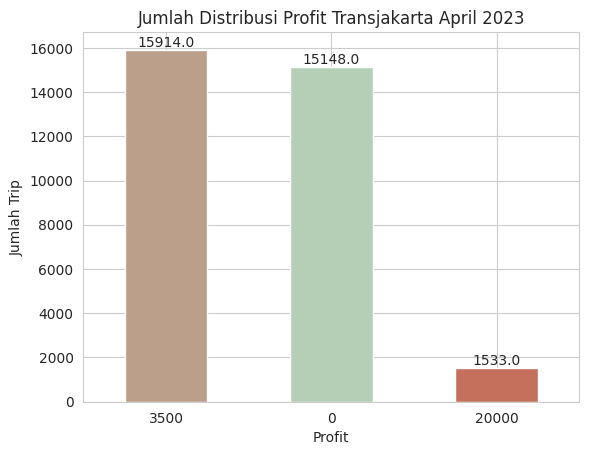

In [11]:
profit = origin["profit"].value_counts()

title = "Jumlah Distribusi Profit Transjakarta April 2023"

barplot(profit, title=title, xlabel="Profit", ylabel="Jumlah Trip")

Something Weird, 15.148 Trip is Resulting 0 Profit, What's That ? 

also, 1.533 Trip Resulting 20.000 Profit, What's That ?

In [12]:
jaklin = origin[origin["corridor_id"].str.startswith("JAK")]

total_jaklin = len(jaklin)

total_jaklin

11927

11.927 Trip out of 15.148 Trip is Jaklingko Trip. 

Jaklingko Rp. 0 Policies is the Main Cause Why There Are 11.927 Trip with 0 Profit

In [13]:
jaklin_profit = jaklin["profit"].sum()

assert jaklin_profit == 0, "Fail !"

In [14]:
nul = origin[origin["profit"] == 0]

total_nul = len(nul)

total_nul

15148

In [15]:
nul_diff = total_nul - total_jaklin

nul_diff

3221

Meanwhile, 3.221 Trip is Probably Coming From Kartu Layanan Gratis User

1.533 Trip that Generate Rp. 20.000 is Royal Trans

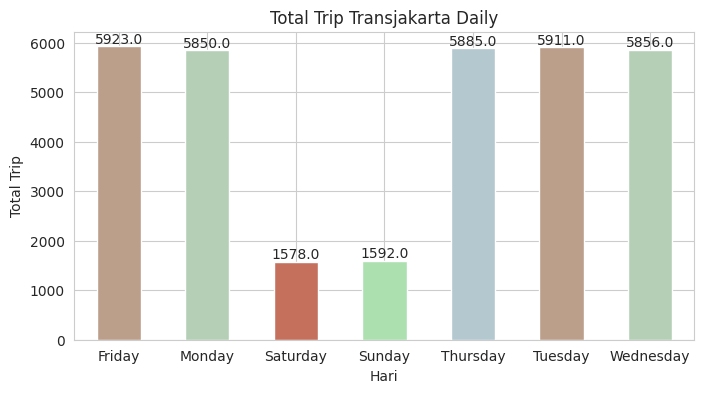

In [16]:
daily_trip = origin.groupby("in_day")["profit"].count()

xlabel = "Hari"

ylabel = "Total Trip"

title = "Total Trip Transjakarta Daily"

barplot(daily_trip, xlabel=xlabel, ylabel=ylabel, title=title, figsize=(8, 4))

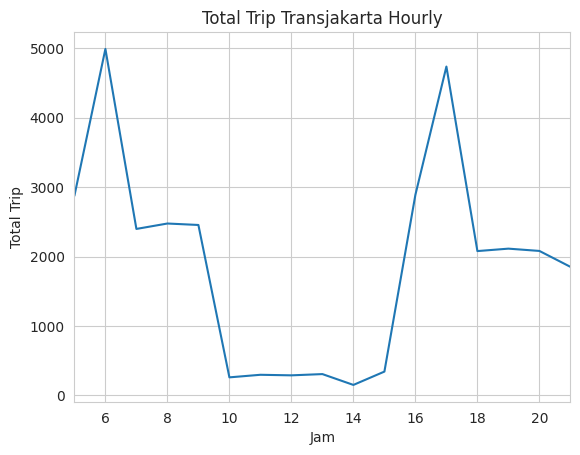

In [17]:
hourly_trip = origin.groupby("in_hour")["profit"].count()

xlabel = "Jam"

ylabel = "Total Trip"

title = "Total Trip Transjakarta Hourly"

xlim = (hourly_trip.index.min(), hourly_trip.index.max())

plot = hourly_trip.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, xlim=xlim);

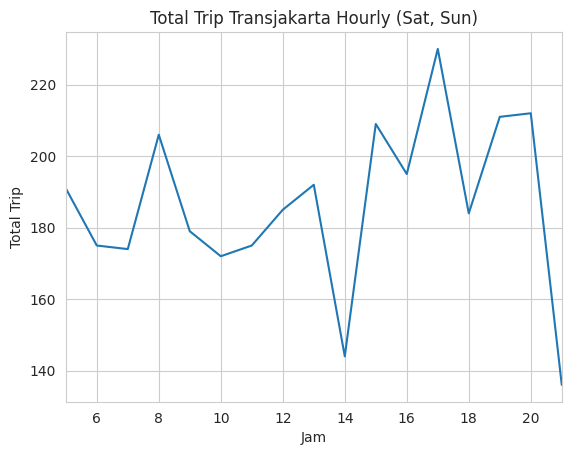

In [18]:
liburan = origin[origin["in_day"].isin(["Saturday", "Sunday"])]

hourly_trip = liburan.groupby("in_hour")["profit"].count()

xlabel = "Jam"

ylabel = "Total Trip"

title = "Total Trip Transjakarta Hourly (Sat, Sun)"

xlim = (hourly_trip.index.min(), hourly_trip.index.max())

plot = hourly_trip.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, xlim=xlim);